# Importing Libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy import stats

ModuleNotFoundError: No module named 'pandas'

# Step 1: Load Data
# Using a sample dataset from seaborn

In [2]:
data = pd.read_csv("titanic.csv")

# Step 2: Basic Data Exploration

In [3]:
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
   PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S   
1  female  38.0      1      0          PC 17599  71.2833   C85        C   
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S   
3  female  35.0      1      0            113803  53.1000  C123        S   
4    male  35.0      0      0            373450   8.0500   NaN        S   

   Survived  
0         0  
1         1  
2         1  
3

In [4]:
print("Summary of the dataset:")
print(data.info())

Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
print("Descriptive statistics:")
print(data.describe())

Descriptive statistics:
       PassengerId      Pclass         Age       SibSp       Parch  \
count   891.000000  891.000000  714.000000  891.000000  891.000000   
mean    446.000000    2.308642   29.699118    0.523008    0.381594   
std     257.353842    0.836071   14.526497    1.102743    0.806057   
min       1.000000    1.000000    0.420000    0.000000    0.000000   
25%     223.500000    2.000000   20.125000    0.000000    0.000000   
50%     446.000000    3.000000   28.000000    0.000000    0.000000   
75%     668.500000    3.000000   38.000000    1.000000    0.000000   
max     891.000000    3.000000   80.000000    8.000000    6.000000   

             Fare    Survived  
count  891.000000  891.000000  
mean    32.204208    0.383838  
std     49.693429    0.486592  
min      0.000000    0.000000  
25%      7.910400    0.000000  
50%     14.454200    0.000000  
75%     31.000000    1.000000  
max    512.329200    1.000000  


# Step 3: Handling Missing Values

In [6]:
print("Missing values in the dataset:")
print(data.isnull().sum())

Missing values in the dataset:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64


Filling missing values for 'age' with the median and 'embarked' with the mode

In [9]:
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

/tmp/ipykernel_79866/411677293.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
/tmp/ipykernel_79866/411677293.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [12]:
data=data.drop(columns='Cabin', axis=1)

In [13]:
print("Missing values after imputation:")
print(data.isnull().sum())

Missing values after imputation:
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Survived       0
dtype: int64


# Step 4: Data Visualization
# Countplot for categorical data (Survived)

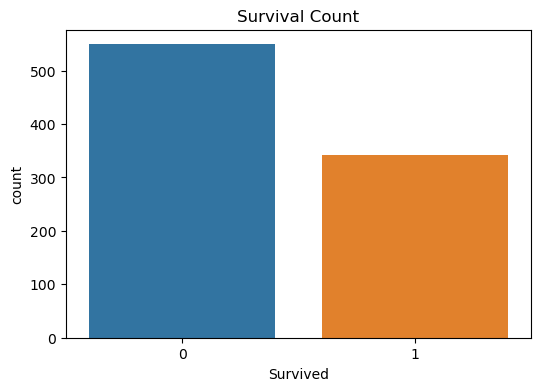

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=data)
plt.title("Survival Count")
plt.show()

Visualizing null values with a heatmap

/home/royalpianist/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


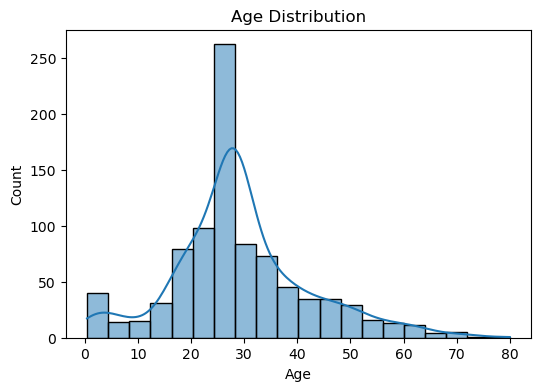

In [16]:
# Histogram for numerical data (Age distribution)
plt.figure(figsize=(6,4))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

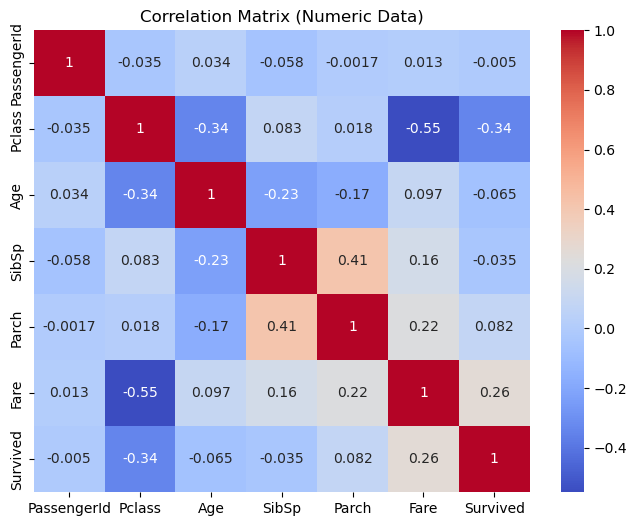

In [17]:
# Selecting only numeric columns for the correlation matrix
numeric_data = data.select_dtypes(include=[np.number])

# Creating the heatmap for only numerical columns
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Numeric Data)")
plt.show()

# Step 5: Checking Duplicates

In [18]:
print("Number of duplicate rows:", data.duplicated().sum())

Number of duplicate rows: 0


# Step 6: Unique Values

In [20]:
# Step 6: Unique Values
print("Unique values in 'embarked' column:", data['Embarked'].unique())

Unique values in 'embarked' column: ['S' 'C' 'Q']


# Step 7: Value Counts

In [23]:
print("Value counts for 'class' column:")
print(data['Pclass'].value_counts())

Value counts for 'class' column:
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


# Step 8: Feature Engineering
Creating a new column 'family_size' by adding 'sibsp' and 'parch'

In [26]:
data['Family_size'] = data['SibSp'] + data['Parch']
print("First 5 rows with new 'family_size' feature:")
print(data.head())

First 5 rows with new 'family_size' feature:
   PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Embarked  Survived  \
0    male  22.0      1      0         A/5 21171   7.2500        S         0   
1  female  38.0      1      0          PC 17599  71.2833        C         1   
2  female  26.0      0      0  STON/O2. 3101282   7.9250        S         1   
3  female  35.0      1      0            113803  53.1000        S         1   
4    male  35.0      0      0            373450   8.0500        S         0   

   Family_size  


 # Correlation Analysis

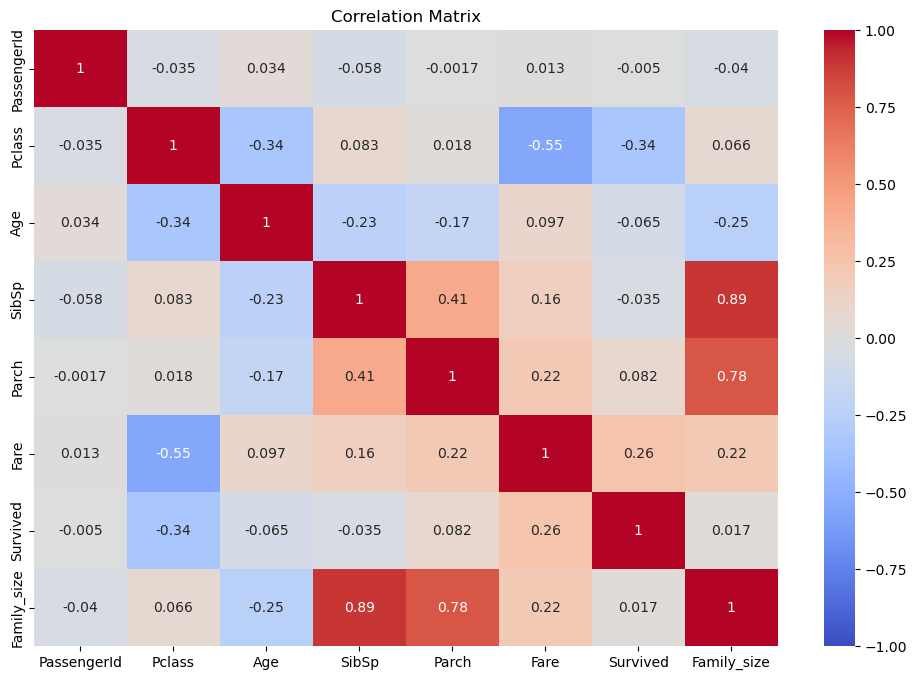

In [27]:
# Select only numerical columns for correlation analysis
numerical_data = data.select_dtypes(include=[np.number])

# Compute correlation matrix
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

# Normalization / Standardization
Standardizing numerical features: 'age' and 'fare'

In [29]:
scaler = StandardScaler()
data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])

print("Data after standardization of 'age' and 'fare':")
print(data[['Age', 'Fare']].head())


Data after standardization of 'age' and 'fare':
        Age      Fare
0 -0.565736 -0.502445
1  0.663861  0.786845
2 -0.258337 -0.488854
3  0.433312  0.420730
4  0.433312 -0.486337


# Outlier Detection
Detect outliers in 'fare' using z-scores

In [31]:
z_scores = np.abs(stats.zscore(data[['Fare']]))
outliers = data[(z_scores > 3).any(axis=1)]

print(f"Number of outliers in 'fare' column: {len(outliers)}")
print("Outliers in 'fare':")
print(outliers[['Fare', 'Age', 'Pclass', 'Survived']])

Number of outliers in 'fare' column: 20
Outliers in 'fare':
         Fare       Age  Pclass  Survived
27   4.647001 -0.796286       1         0
88   4.647001 -0.488887       1         1
118  4.335332 -0.412037       1         0
258  9.667167  0.433312       1         1
299  4.335332  1.586059       1         1
311  4.634417 -0.873136       1         1
341  4.647001 -0.412037       1         1
377  3.610065 -0.181487       1         0
380  3.932723  0.971260       1         1
438  4.647001  2.661957       1         0
527  3.817033 -0.104637       1         0
557  3.932723 -0.104637       1         0
679  9.667167  0.510161       1         1
689  3.606793 -1.103685       1         1
700  3.932723 -0.873136       1         1
716  3.932723  0.663861       1         1
730  3.606793 -0.027788       1         1
737  9.667167  0.433312       1         1
742  4.634417 -0.642586       1         1
779  3.606793  1.048110       1         1


# Final Dataset Overview

In [32]:
print("Final dataset overview:")
print(data.info())
print("First few rows of the cleaned dataset:")
print(data.head())

Final dataset overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
 10  Survived     891 non-null    int64  
 11  Family_size  891 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB
None
First few rows of the cleaned dataset:
   PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1